In [1]:
critics={
     'hhd':{'guardians of the galaxy 2':5,'christmas in august':4,'boss baby':1.5},
     'chs':{'christmas in august':5,'boss baby':2},
     'kmh':{'guardians of the galaxy 2':2.5,'christmas in august':2,'boss baby':1},
     'leb':{'guardians of the galaxy 2':3.5,'christmas in august':4,'boss baby':5}
}

In [2]:
critics.get('hhd')

{'guardians of the galaxy 2': 5, 'christmas in august': 4, 'boss baby': 1.5}

In [3]:
critics.get('hhd').get('boss baby')

1.5

In [4]:
from math import sqrt

In [6]:
sqrt(pow(1,2)+pow(3,2))

3.1622776601683795

In [7]:
def sim(i, j):
    return sqrt(pow(i,2)+pow(j,2))

In [8]:
var1 =  critics['chs']['christmas in august']-critics['leb']['christmas in august']
var2 =  critics['chs']['boss baby']-critics['leb']['boss baby']
sim(var1,var2) #위에서 정의한 함수

3.1622776601683795

In [9]:
for i in critics:
    if i!='chs': #자기자신제외
        num1 = critics.get('chs').get('christmas in august')- critics.get(i).get('christmas in august')
        num2 = critics.get('chs').get('boss baby')- critics.get(i).get('boss baby')
        print(i," : ", sim(num1,num2))

hhd  :  1.118033988749895
kmh  :  3.1622776601683795
leb  :  3.1622776601683795


In [10]:
for i in critics:
    if i!='chs':
        num1 = critics.get('chs').get('christmas in august')- critics.get(i).get('christmas in august')
        num2 = critics.get('chs').get('boss baby')- critics.get(i).get('boss baby')
        print(i," : ", 1/(1+sim(num1,num2))) #정규화

hhd  :  0.4721359549995794
kmh  :  0.2402530733520421
leb  :  0.2402530733520421


In [11]:
def sim_distance(data, name1, name2):
    sum=0
    for i in data[name1]:
        if i in data[name2]: #같은 영화를 봤다면
            sum+=pow(data[name1][i]- data[name2][i],2)
        
    return 1/(1+sqrt(sum))

In [12]:
sim_distance(critics, 'chs','leb')

0.2402530733520421

In [19]:
def top_match(data, name, index=3, sim_function=sim_distance):
    li=[]
    for i in data:
        if name!=i: #자기 자신은 제외한다
            li.append((sim_function(data,name,i),i)) # 유사도, 이름을 튜플에 묶어 리스트에 추가한다
    li.sort() #오름차순 정렬
    li.reverse() #내림차순 정렬
    
    return li[:index]


In [20]:
top_match(critics, 'chs')

[(0.4721359549995794, 'hhd'),
 (0.2402530733520421, 'leb'),
 (0.2402530733520421, 'kmh')]

In [27]:
import matplotlib.pyplot as plt
def barchart(data, labels): # data, labels는 list형태로 사용
    positions = range(len(data))
    plt.barh(positions, data, height=0.5,color='r') #가로
    plt.yticks(positions, labels)
    plt.xlabel('similarity') #x축
    plt.ylabel('name') #y축
    plt.show() #출력


In [22]:
li = top_match(critics, 'chs')

In [23]:
score= []
names= []
 
for i in li:
    score.append(i[0])
    names.append(i[1])

In [24]:
score

[0.4721359549995794, 0.2402530733520421, 0.2402530733520421]

In [25]:
names

['hhd', 'leb', 'kmh']

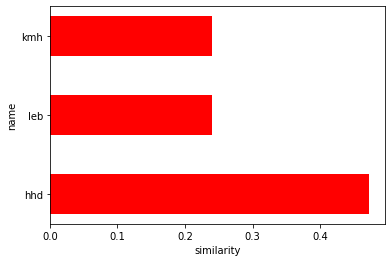

In [28]:
barchart(score,names)

In [29]:
critics = {
    '차현석': {
        '택시운전사': 2.5,
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        '범죄도시': 3.5,
        '아이 캔 스피크': 2.5,
        'The Night Listener': 3.0,
    },
    '황해도': {
        '택시운전사': 1.0,
        '남한산성': 4.5,
        '킹스맨:골든서클': 0.5,
        '범죄도시': 1.5,
        '아이 캔 스피크': 4.5,
        'The Night Listener': 5.0,
    },
    '김미희': {
        '택시운전사': 3.0,
        '남한산성': 3.5,
        '킹스맨:골든서클': 1.5,
        '범죄도시': 5.0,
        'The Night Listener': 3.0,
        '아이 캔 스피크': 3.5,
    },
    '김준형': {
        '택시운전사': 2.5,
        '남한산성': 3.0,
        '범죄도시': 3.5,
        'The Night Listener': 4.0,
    },
    '이은비': {
        '남한산성': 3.5,
        '킹스맨:골든서클': 3.0,
        'The Night Listener': 4.5,
        '범죄도시': 4.0,
        '아이 캔 스피크': 2.5,
    },
    '임명진': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        '킹스맨:골든서클': 2.0,
        '범죄도시': 3.0,
        'The Night Listener': 3.5,
        '아이 캔 스피크': 2.0,
    },
    '심수정': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        'The Night Listener': 3.0,
        '범죄도시': 5.0,
        '아이 캔 스피크': 3.5,
    },
    '박병관': {'남한산성': 4.5, '아이 캔 스피크': 1.0,
             '범죄도시': 4.0},
}


In [30]:
from matplotlib import font_manager, rc #한글이 나오게
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


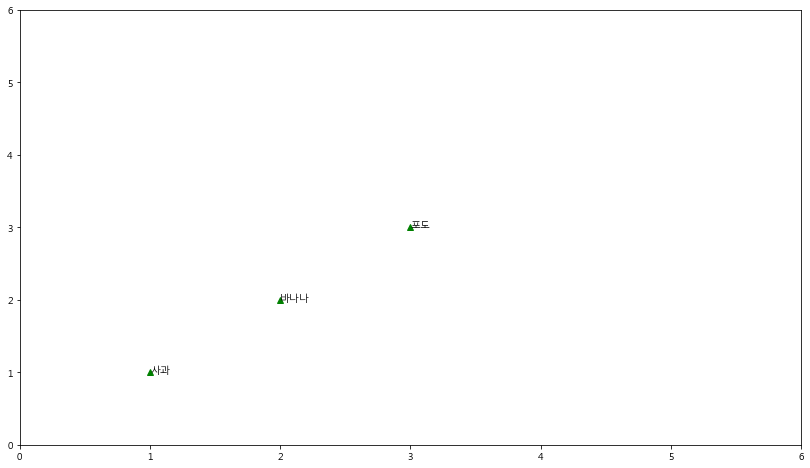

In [31]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^') #각각의 값과 점의 모양설정
plt.text(1,1,'사과') #텍스트 찍기
plt.text(2,2,'바나나')
plt.text(3,3,'포도')
#각 축의 크기 설정
plt.axis([0,6,0,6]) # 그래프의 x축,y축 크기설정
plt.show()


In [32]:
# critics data 이용해 scatter plot 그리기
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8)) # plot 크기설정
    
    # plot 좌표를 위한 list 선언
    li = []
    li2 = []
    
    for i in critics[name1]: # i = 키 값
        if i in data[name2]: # 같은 영화를 평가했을때만
            li.append(critics[name1][i]) # name1의 평점 li[]에 추가
            li2.append(critics[name2][i]) # name2의 평점 li2[]에 추가
            plt.text(critics[name1][i],critics[name2][i],i) # 영화 제목 text 찍기
            
    plt.plot(li,li2,'ro') #plot그리기
    
    #각 축의 크기 설정 (0에서 6까지)
    plt.axis([0,6,0,6])
 
    # x축과 y축 이름 설정
    plt.xlabel(name1)
    plt.ylabel(name2)
 
    # 그리기
    plt.show()


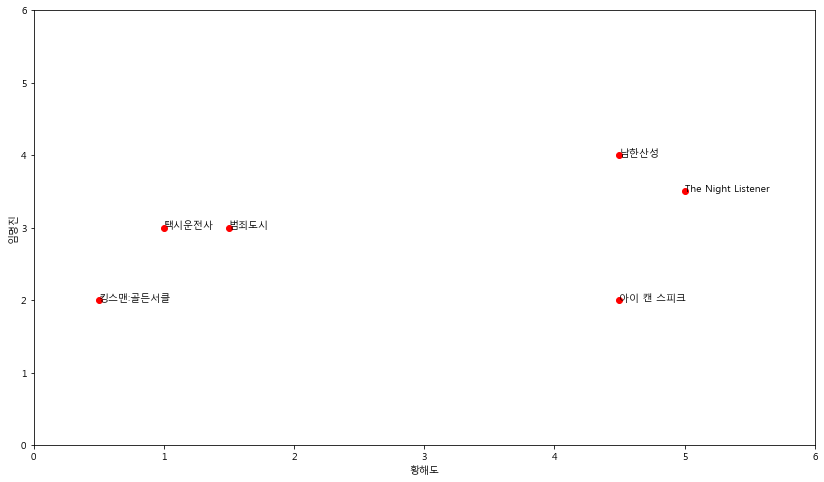

In [33]:
drawGraph(critics,'황해도','임명진')

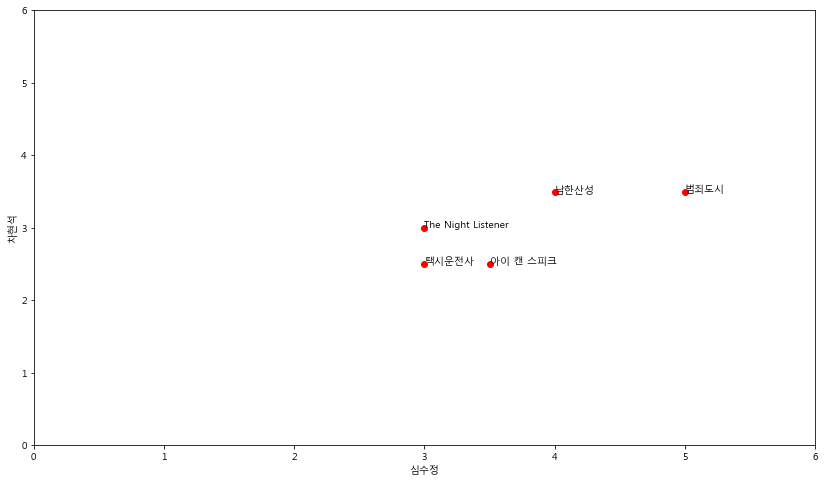

In [34]:
drawGraph(critics,'심수정','차현석')

In [35]:
# 피어슨 상관계수 구하기
def sim_pearson(data, name1, name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))
 


In [36]:
sim_pearson(critics,'황해도','임명진')

0.41791069697885247

In [37]:
sim_pearson(critics, '심수정','차현석')

0.7470178808339965

In [38]:
# 딕셔너리 돌면서 상관계수순으로 정렬
def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]


In [43]:
top_match(critics, '박병관',6)

[(0.9912407071619299, '차현석'),
 (0.9244734516419049, '임명진'),
 (0.8934051474415647, '이은비'),
 (0.66284898035987, '심수정'),
 (0.38124642583151164, '김미희'),
 (-0.38124642583151164, '황해도')]

In [40]:
def getRecommendation (data,person,sim_function=sim_pearson):
    result = top_match(critics, person ,len(data))
    
    simSum=0 # 유사도 합을 위한 변수
    score=0 # 평점 합을 위한 변수
    li=[] # 리턴을 위한 리스트
    score_dic={} # 유사도 총합을 위한 dic
    sim_dic={} # 평점 총합을 위한 dic
 
    for sim,name in result: # 튜플이므로 한번에 
        if sim<0 : continue #유사도가 양수인 사람만
        for movie in data[name]: 
            if movie not in data[person]: #name이 평가를 내리지 않은 영화
                score+=sim*data[name][movie] # 그사람의 영화평점 * 유사도
                score_dic.setdefault(movie,0) # 기본값 설정
                score_dic[movie]+=score # 합계 구함
 
                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie,0) 
                sim_dic[movie]+=sim
 
            score=0  #영화가 바뀌었으니 초기화한다
    
    for key in score_dic: 
        score_dic[key]=score_dic[key]/sim_dic[key] # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li


In [41]:
getRecommendation(critics, '박병관')

[(3.467750847406967, 'The Night Listener'),
 (2.8325499182641614, '택시운전사'),
 (2.5309807037655645, '킹스맨:골든서클')]